<img src="out/generated_images.gif" style="float:right;height:200px">
<img src="../../assets/AE.png" style="float:right;height:200px">

# **V**ariational **A**uto **E**ncoder

This notebook tests the implementation of a variational autoencoder.

This model is one part of the **WorldModel** included in the *WorlRewardModel* which is responisble to encode the observation <br> for the **MD-RNN model** so it can predict the next observation. This notbook tests the **VAE** using the MNIST dataset.


In [1]:
import torch
import torch.optim as optim
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision
import matplotlib
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from AutoEncoder import *
from utils import save_reconstructed_images, image_to_vid, save_loss_plot
matplotlib.style.use('ggplot')

In [2]:
# initialize the model
model = ConvVAE()
# set the learning parameters
lr = 0.001
epochs = 20
batch_size = 64
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.BCELoss(reduction='sum')
# a list to save all the reconstructed images in PyTorch grid format
grid_images = []

In [3]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
])
# training set and train data loader
trainset = torchvision.datasets.MNIST(
    root='../input', train=True, download=True, transform=transform
)
trainloader = DataLoader(
    trainset, batch_size=batch_size, shuffle=True
)
# validation set and validation data loader
testset = torchvision.datasets.MNIST(
    root='../input', train=False, download=True, transform=transform
)
testloader = DataLoader(
    testset, batch_size=batch_size, shuffle=False
)

/home/neonode/anaconda3/envs/datascience/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Epoch 1 of 20


938it [00:43, 21.59it/s]                         
157it [00:02, 55.68it/s]                         


Train Loss: 15502.2364
Val Loss: 11756.6812
Epoch 2 of 20


938it [00:44, 21.13it/s]                         
157it [00:03, 47.05it/s]                         


Train Loss: 11200.3825
Val Loss: 10868.9850
Epoch 3 of 20


938it [00:44, 21.23it/s]                         
157it [00:02, 56.64it/s]                         


Train Loss: 10790.9385
Val Loss: 10701.1567
Epoch 4 of 20


938it [00:44, 21.31it/s]                         
157it [00:02, 56.14it/s]                         


Train Loss: 10630.9243
Val Loss: 10511.4049
Epoch 5 of 20


938it [00:44, 21.28it/s]                         
157it [00:02, 56.67it/s]                         


Train Loss: 10531.0838
Val Loss: 10513.6167
Epoch 6 of 20


938it [00:44, 21.18it/s]                         
157it [00:02, 55.58it/s]                         


Train Loss: 10459.7331
Val Loss: 10391.7545
Epoch 7 of 20


938it [00:43, 21.38it/s]                         
157it [00:02, 55.99it/s]                         


Train Loss: 10386.4367
Val Loss: 10248.7639
Epoch 8 of 20


938it [00:44, 21.20it/s]                         
157it [00:02, 55.74it/s]                         


Train Loss: 10173.8931
Val Loss: 10016.1455
Epoch 9 of 20


938it [00:44, 21.21it/s]                         
157it [00:02, 56.50it/s]                         


Train Loss: 10015.0534
Val Loss: 9936.4109
Epoch 10 of 20


938it [00:43, 21.41it/s]                         
157it [00:02, 54.74it/s]                         


Train Loss: 9924.4527
Val Loss: 9873.1626
Epoch 11 of 20


938it [00:44, 21.30it/s]                         
157it [00:02, 53.54it/s]                         


Train Loss: 9877.4359
Val Loss: 9830.5513
Epoch 12 of 20


938it [00:43, 21.32it/s]                         
157it [00:02, 56.94it/s]                         


Train Loss: 9843.1942
Val Loss: 9767.7853
Epoch 13 of 20


938it [00:44, 21.18it/s]                         
157it [00:02, 53.70it/s]                         


Train Loss: 9812.0022
Val Loss: 9741.7682
Epoch 14 of 20


938it [00:44, 21.27it/s]                         
157it [00:02, 55.61it/s]                         


Train Loss: 9785.4131
Val Loss: 9724.7468
Epoch 15 of 20


938it [00:44, 21.20it/s]                         
157it [00:02, 56.07it/s]                         


Train Loss: 9765.4340
Val Loss: 9688.6532
Epoch 16 of 20


938it [00:44, 21.11it/s]                         
157it [00:02, 55.66it/s]                         


Train Loss: 9748.1102
Val Loss: 9715.3007
Epoch 17 of 20


938it [00:44, 21.18it/s]                         
157it [00:02, 53.02it/s]                         


Train Loss: 9729.3914
Val Loss: 9682.3003
Epoch 18 of 20


938it [00:44, 20.98it/s]                         
157it [00:02, 55.74it/s]                         


Train Loss: 9717.5705
Val Loss: 9669.3096
Epoch 19 of 20


938it [00:44, 21.09it/s]                         
157it [00:02, 55.11it/s]                         


Train Loss: 9699.5200
Val Loss: 9716.5411
Epoch 20 of 20


938it [00:44, 21.12it/s]                         
157it [00:02, 56.37it/s]                         


Train Loss: 9687.9625
Val Loss: 9643.4381


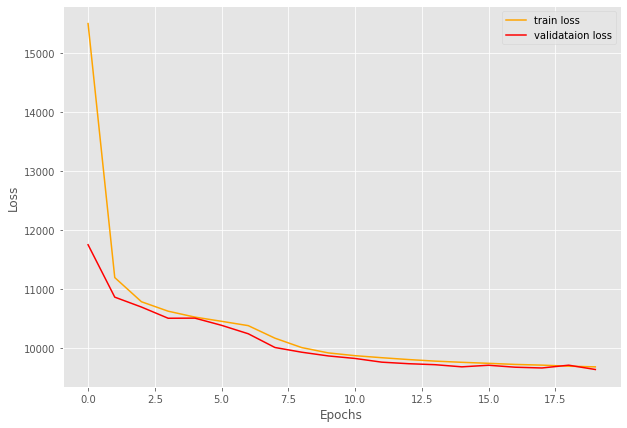

TRAINING COMPLETE


In [4]:
train_loss = []
valid_loss = []
for epoch in range(epochs):
    print(f"Epoch {epoch+1} of {epochs}")
    train_epoch_loss = model.trainStep(
        trainloader, trainset, optimizer, criterion
    )
    valid_epoch_loss, recon_images = model.validate(
        testloader, testset, criterion
    )
    train_loss.append(train_epoch_loss)
    valid_loss.append(valid_epoch_loss)
    # save the reconstructed images from the validation loop
    save_reconstructed_images(recon_images, epoch+1)
    # convert the reconstructed images to PyTorch image grid format
    image_grid = make_grid(recon_images.detach().cpu())
    grid_images.append(image_grid)
    print(f"Train Loss: {train_epoch_loss:.4f}")
    print(f"Val Loss: {valid_epoch_loss:.4f}")
    
# save the reconstructions as a .gif file
image_to_vid(grid_images)
# save the loss plots to disk
save_loss_plot(train_loss, valid_loss)
print('TRAINING COMPLETE')